In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
!pip install pandas matplotlib seaborn wordcloud
!pip install --upgrade pip
!pip install koreanize-matplotlib
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 109.8 MB/s eta 0:00:00


In [34]:
import shutil
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 사용자 폰트 경로
user_font_path = "/content/drive/MyDrive/25-1/공모전/a고딕16.ttf"

# 시스템 폰트 경로로 복사
shutil.copy(user_font_path, "/usr/share/fonts/truetype/a고딕16.ttf")

# matplotlib이 인식하도록 FontProperties 객체로 직접 등록
font_prop = fm.FontProperties(fname="/usr/share/fonts/truetype/a고딕16.ttf")

# 폰트 이름 확인
font_name = font_prop.get_name()
print("📌 실제 인식된 폰트 이름:", font_name)

# 전역 설정에 반영
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False


📌 실제 인식된 폰트 이름: KoreanGD16R


In [2]:
import pandas as pd

post = pd.read_csv('/content/drive/MyDrive/25-1/공모전/posts_tag_tokenized.csv')

post.head()

,post_id,제목,내용,태그,작성일,해시태그
0,1,"중반/NNG,전공자/NNG,섬유/NNG,업계/NNG,취업/NNG","안녕하세요/NNP,중반/NNG,남자/NNG,육아/NNG,경력/NNG,단절/NNG,기...",섬유·의류·패션,3시간 전 작성,NaN
1,2,"경력/NNG,경력/NNG,기술/NNG,기입/NNG","공간/NNG,디자인/NNG,분야/NNG,패키지/NNG,디자인/NNG,이직/NNG,준...",시각디자이너,3시간 전 작성,패키지디자인
2,3,"온라인/NNG,토스/NNG,기획/NNG,스터디/NNG,모집/NNG,현직/NNG,취준...","혼자/MAG,스터디/NNG,함께/MAG,현직/NNG,인사이트/NNP,교류/NNG,스...",PL·PM·PO,5시간 전 작성,NaN
3,4,"실내/NNG,디자인/NNG,분야/NNG,순위/NNG,매기/VV","상가/NNG,경력/NNG,현재/MAG,학교/NNG,위주/NNG,인테리어/NNG,회사...",실내디자이너,5시간 전 작성,NaN
4,5,"물류/NNG,아웃소싱/NNG,소속/NNG,이직/NNG,가능/NNG","기업/NNG,규모/NNG,물류/NNG,사업/NNG,복지/NNG,인건비/NNG,관리/...",물류관리자,18시간 전 작성,NaN


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from collections import Counter
from itertools import combinations
import networkx as nx
import pandas as pd


# 2. 한 글자짜리 제거하면서 토큰 리스트 생성
token_lists = post['내용'].dropna().apply(
    lambda x: [
        token.split('/')[0]
        for token in x.split(',')
        if len(token.split('/')[0]) > 1  # 여기서 한 글자 제거
    ]
)

# 3. 공동 출현 카운트
co_occurrence = Counter()
for tokens in token_lists:
    for w1, w2 in combinations(set(tokens), 2):
        if w1 != w2:
            pair = tuple(sorted([w1, w2]))
            co_occurrence[pair] += 1

# 4. 그래프 구성 (출현 횟수 2 이상만)
G = nx.Graph()
for (w1, w2), weight in co_occurrence.items():
    if weight >= 2:
        G.add_edge(w1, w2, weight=weight)

# 5. 중심성 분석
centrality = nx.degree_centrality(G)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45843 (\N{HANGUL SYLLABLE DAES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

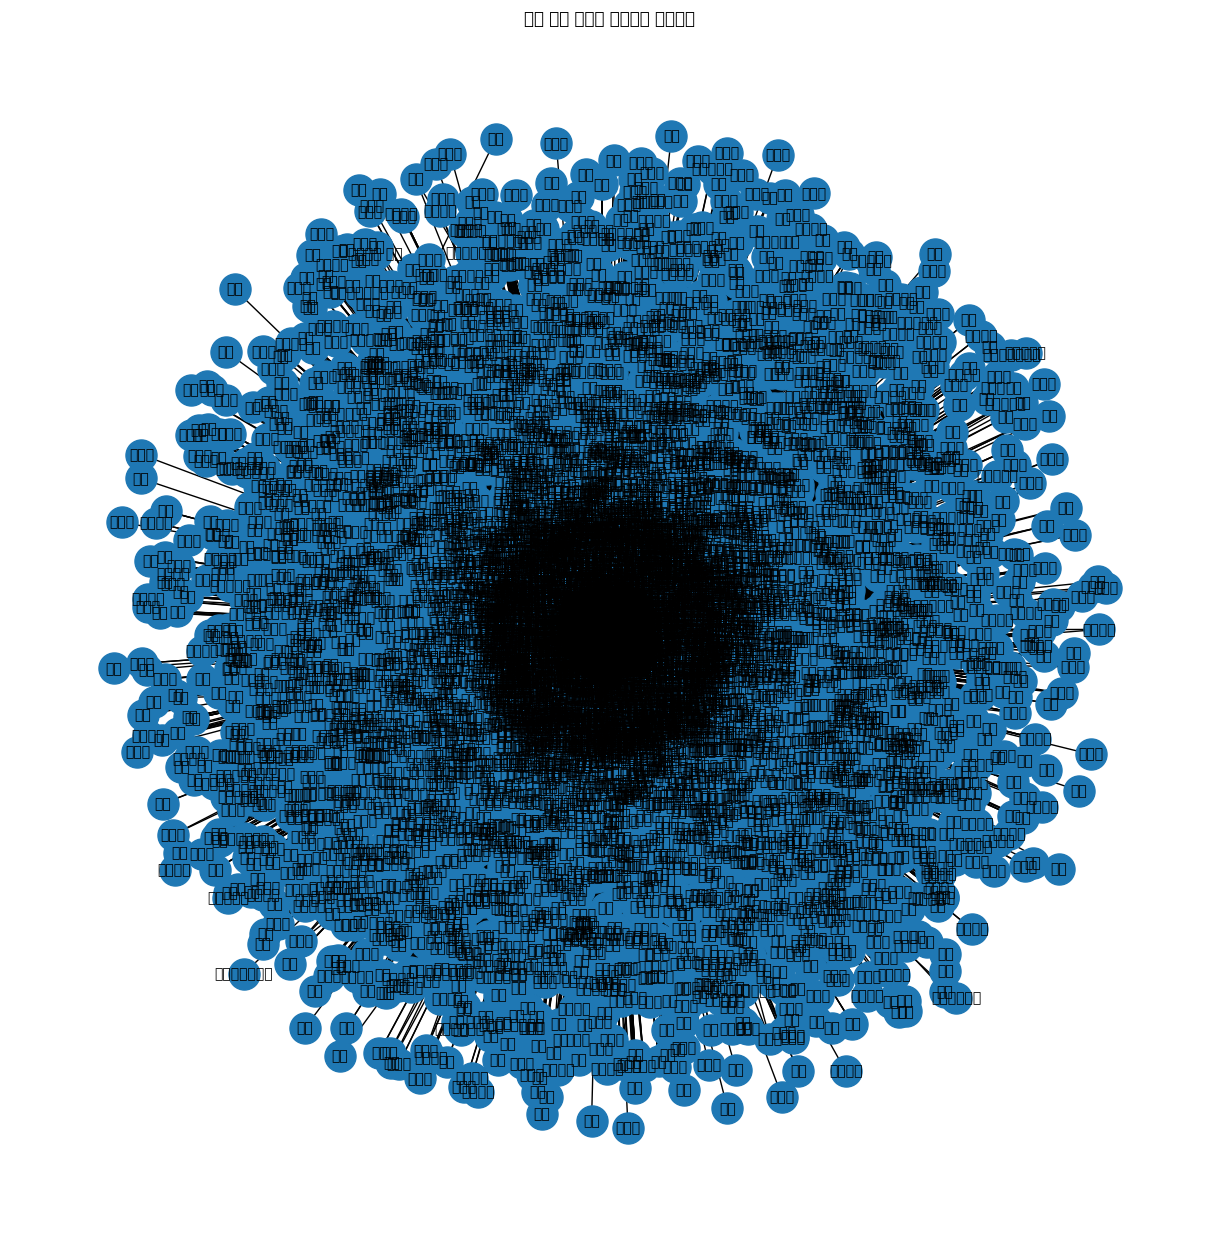

In [ ]:
# 네트워크 모델링
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10)
plt.title("댓글 기반 키워드 동시출현 네트워크")
plt.show()

In [5]:
import plotly.graph_objects as go

def draw_subgraph_plotly(G, center_word, depth=1):
    if center_word not in G:
        print(f"'{center_word}'는 그래프에 없습니다.")
        return

    # 중심 단어 주변 노드 수집
    nodes = set([center_word])
    frontier = set([center_word])
    for _ in range(depth):
        next_frontier = set()
        for node in frontier:
            next_frontier |= set(G.neighbors(node))
        nodes |= next_frontier
        frontier = next_frontier

    subG = G.subgraph(nodes)

    # 레이아웃 좌표 계산
    pos = nx.spring_layout(subG, k=0.5, seed=42)

    # 노드 정보
    node_x = [pos[node][0] for node in subG.nodes()]
    node_y = [pos[node][1] for node in subG.nodes()]
    node_text = list(subG.nodes())

    # 엣지 정보
    edge_x, edge_y = [], []
    for u, v in subG.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1, color='gray'),
        hoverinfo='none',
        mode='lines'
    )

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        textposition='top center',
        marker=dict(size=20, color='lightblue'),
        hovertext=node_text,
        hoverinfo='text'
    )

    fig = go.Figure(data=[edge_trace, node_trace])
    fig.update_layout(
        title=f"<b>{center_word} 중심 서브 네트워크</b>",
        template='plotly_white',
        showlegend=False,
        height=600,
        margin=dict(l=40, r=40, t=60, b=40)
    )
    fig.show()


In [6]:
def draw_filtered_graph_plotly(G, min_weight=3):
    filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= min_weight]
    subG = G.edge_subgraph(filtered_edges).copy()

    if len(subG) == 0:
        print("조건에 맞는 edge가 없습니다.")
        return

    pos = nx.spring_layout(subG, k=0.5, seed=42)

    edge_x, edge_y = [], []
    for u, v in subG.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1, color='gray'),
        hoverinfo='none',
        mode='lines'
    )

    node_x = [pos[node][0] for node in subG.nodes()]
    node_y = [pos[node][1] for node in subG.nodes()]
    node_text = list(subG.nodes())

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        textposition='top center',
        marker=dict(size=20, color='orange'),
        hovertext=node_text,
        hoverinfo='text'
    )

    fig = go.Figure(data=[edge_trace, node_trace])
    fig.update_layout(
        title=f"<b>Edge weight ≥ {min_weight}인 네트워크</b>",
        template='plotly_white',
        showlegend=False,
        height=600,
        margin=dict(l=40, r=40, t=60, b=40)
    )
    fig.show()


In [53]:
import plotly.graph_objects as go
import networkx as nx

def draw_top_central_nodes_plotly(G, top_k=20):
    font_name = "a고딕16"
    centrality = nx.degree_centrality(G)
    top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:top_k]
    top_node_names = [n for n, _ in top_nodes]
    subG = G.subgraph(top_node_names)
    pos = nx.spring_layout(subG, k=0.5, seed=42)

    node_x = [pos[node][0] for node in subG.nodes()]
    node_y = [pos[node][1] for node in subG.nodes()]
    node_text = list(subG.nodes())

    # 🎨 Edge color → 파랑~하늘 계열로 변환
    edge_traces = []
    max_weight = max([d['weight'] for _, _, d in subG.edges(data=True)] or [1])
    for u, v, d in subG.edges(data=True):
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        weight = d.get("weight", 1)
        blue_intensity = int(255 * weight / max_weight)
        edge_color = f'rgba(0, 0, {blue_intensity}, 0.8)'

        edge_trace = go.Scatter(
            x=[x0, x1, None],
            y=[y0, y1, None],
            line=dict(
                width=1 + (weight / max_weight) * 4,
                color=edge_color
            ),
            hoverinfo='text',
            mode='lines',
            text=[f'{u} ↔ {v}<br>weight={weight}']
        )
        edge_traces.append(edge_trace)

    # 🎯 텍스트 테두리용 (아래 깔림)
    node_text_outline = go.Scatter(
        x=node_x, y=node_y,
        mode='text',
        text=node_text,
        textposition='middle center',
        textfont=dict(size=18, color='black', family=font_name),
        hoverinfo='skip',
        showlegend=False
    )

    # 🎯 노드 본체 + 글자
    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='text+markers',
        text=node_text,
        textposition='middle center',
        textfont=dict(size=36, color='white', family=font_name),
        marker=dict(
            size=100,
            color='royalblue',                  # 메인 노드 색
            line=dict(width=2, color='navy')    # 테두리 색
        ),
        hovertext=node_text,
        hoverinfo='text'
    )

    # 🔧 레이아웃 구성
    fig = go.Figure(data=edge_traces + [node_text_outline, node_trace])
    fig.update_layout(
        title=f"<b>Top-{top_k} 중심 노드 네트워크</b>",
        template='plotly_white',
        font=dict(family=font_name),
        showlegend=False,
        height=700,
        margin=dict(l=40, r=40, t=60, b=40),
        plot_bgcolor='white',
        paper_bgcolor='white'
    )
    fig.show()


In [ ]:
draw_subgraph_plotly(G, center_word='연봉', depth=1)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
draw_filtered_graph_plotly(G, min_weight=500)

In [54]:
draw_top_central_nodes_plotly(G, top_k=15)

In [ ]:
# 제외할 단어 정의
제외_키워드 = {'이직', '회사', '생각', '정도', '현재', '다니', '너무', '안녕',
          '지금', '많이', '관련', '드리', '가능', '계속', '이상','모르', '대하',
          '나오', '들어가', '졸업', '그냥', '마음', '조금', '처음', '힘들', '부분', '다르',
          '준비', '취업', '고민', '퇴사', '신입', '입사', '나가', '보이', '채우', '이제', '오래',
          '어서', '다시', '없이', '상태', '아직', '정말', '사실', '시간', '면접', '시작', '질문',
          '동안', '합격', '위하', '진행', '이유', '안녕하세요', '가지', '괜찮', '경우', '생기', '거의',
          '이번', '만들', '올리', '바로', '일단', '궁금하', '회계'}

# 중심성 내림차순 정렬 후 제외 단어 제거
sorted_centrality = sorted(
    [(word, score) for word, score in centrality.items() if word not in 제외_키워드],
    key=lambda x: x[1],
    reverse=True
)

# 중심성 상위 20개 키워드 출력
print("\n 중심성 기준 상위 30개 키워드:")
for i, (word, score) in enumerate(sorted_centrality[:30], start=1):
    print(f"{i:2d}. {word:10s} → 중심성 = {score:.4f}")



 중심성 기준 상위 30개 키워드:
 1. 경력         → 중심성 = 0.7038
 2. 업무         → 중심성 = 0.6806
 3. 근무         → 중심성 = 0.5849
 4. 기업         → 중심성 = 0.5434
 5. 연봉         → 중심성 = 0.5310
 6. 사람         → 중심성 = 0.5292
 7. 지원         → 중심성 = 0.5203
 8. 배우         → 중심성 = 0.4977
 9. 자격증        → 중심성 = 0.4731
10. 관리         → 중심성 = 0.4652
11. 직장         → 중심성 = 0.4608
12. 경험         → 중심성 = 0.4588
13. 직무         → 중심성 = 0.4553
14. 나이         → 중심성 = 0.4465
15. 상황         → 중심성 = 0.4262
16. 문제         → 중심성 = 0.4085
17. 공부         → 중심성 = 0.4069
18. 전공         → 중심성 = 0.4012
19. 중소기업       → 중심성 = 0.4009
20. 조언         → 중심성 = 0.3957
21. 디자인        → 중심성 = 0.3933
22. 직원         → 중심성 = 0.3929
23. 선배         → 중심성 = 0.3807
24. 걱정         → 중심성 = 0.3728
25. 분야         → 중심성 = 0.3690
26. 도움         → 중심성 = 0.3647
27. 필요         → 중심성 = 0.3597
28. 채용         → 중심성 = 0.3367
29. 스펙         → 중심성 = 0.3367
30. 혼자         → 중심성 = 0.3362


In [ ]:
# 중심성 키워드 리스트와 점수 딕셔너리 준비
중심성_키워드_리스트 = [word for word, _ in sorted_centrality]
중심성_점수_딕트 = dict(sorted_centrality)

# 게시물마다 교집합 키워드 중 중심성 상위 5개 추출
def 게시물별_중심성_상위5(token_str):
    if pd.isna(token_str):
        return []
    tokens = [token.split('/')[0] for token in token_str.split(',') if len(token.split('/')[0]) > 1]
    unique_tokens = set(tokens)
    공통_키워드 = unique_tokens & set(중심성_키워드_리스트)
    상위5 = sorted(공통_키워드, key=lambda x: 중심성_점수_딕트[x], reverse=True)[:5]
    return 상위5

# 컬럼 생성
post['이직_원인_후보'] = post['내용'].apply(게시물별_중심성_상위5)

In [ ]:
post

,post_id,제목,내용,태그,작성일,해시태그,이직_원인_후보,TFIDF_키워드
0,1,"중반/NNG,전공자/NNG,섬유/NNG,업계/NNG,취업/NNG","안녕하세요/NNP,중반/NNG,남자/NNG,육아/NNG,경력/NNG,단절/NNG,기...",섬유·의류·패션,3시간 전 작성,NaN,"[경력, 직무, 나이, 문제, 전공]","[섬유, 업계, 지식, 무역, 실무]"
1,2,"경력/NNG,경력/NNG,기술/NNG,기입/NNG","공간/NNG,디자인/NNG,분야/NNG,패키지/NNG,디자인/NNG,이직/NNG,준...",시각디자이너,3시간 전 작성,패키지디자인,"[경험, 디자인, 분야, 디자이너, 취준생]","[공간, 디자인, 녹이, 구현, 패키지]"
2,3,"온라인/NNG,토스/NNG,기획/NNG,스터디/NNG,모집/NNG,현직/NNG,취준...","혼자/MAG,스터디/NNG,함께/MAG,현직/NNG,인사이트/NNP,교류/NNG,스...",PL·PM·PO,5시간 전 작성,NaN,"[지원, 배우, 혼자, 기획, 성장]","[스터디, 인사이트, 기획자, 제공, 현직]"
3,4,"실내/NNG,디자인/NNG,분야/NNG,순위/NNG,매기/VV","상가/NNG,경력/NNG,현재/MAG,학교/NNG,위주/NNG,인테리어/NNG,회사...",실내디자이너,5시간 전 작성,NaN,"[경력, 디자인, 분야, 학교, 선택]","[주거, 상가, 인테리어, 감명, 학교]"
4,5,"물류/NNG,아웃소싱/NNG,소속/NNG,이직/NNG,가능/NNG","기업/NNG,규모/NNG,물류/NNG,사업/NNG,복지/NNG,인건비/NNG,관리/...",물류관리자,18시간 전 작성,NaN,"[기업, 관리, 규모, 중견, 사용]","[아웃소싱, 원청, 복지, 본사, 물류]"
...,...,...,...,...,...,...,...,...
10842,10850,"이직/NNG,경력/NNG,관리/NNG,대하/VV","업계/NNG,서비스/NNG,기획/NNG,정도/NNG,경력/NNG,관리/NNG,궁금하...",NaN,2018-06-22 작성,NaN,"[경력, 업무, 관리, 선배, 업계]","[궁금하, 관리, 적응, 서비스, 정도]"
10843,10851,"이직/NNG,직장/NNG,구하/VV,나가/VV","퇴사/NNG,직장/NNG,구하/VV,나가/VV",NaN,2018-06-22 작성,NaN,"[직장, 구하]","[나가, 구하, 직장, 퇴사]"
10844,10852,"회사/NNG,입사/NNG,고민/NNG","직무/NNG,재밌/VA,보이/VV,야근/NNG,스트레스/NNG,원래/MAG,회사/NNG",NaN,2018-06-21 작성,NaN,"[직무, 야근, 원래, 스트레스, 재밌]","[재밌, 스트레스, 원래, 야근, 보이]"
10845,10853,"지금/MAG,커리어/NNG,도움/NNG","재직/NNG,회사/NNG,지금/MAG,커리어/NNG,방향/NNG,다르/VA,어서/M...",NaN,2018-06-21 작성,NaN,"[경력, 커리어, 재직, 방향]","[어서, 방향, 채우, 커리어, 재직]"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 1. 형태소 분석된 텍스트에서 단어만 추출해 공백 구분 텍스트로 변환
documents = post['내용'].dropna().apply(lambda x: ' '.join([
    token.split('/')[0] for token in x.split(',') if len(token.split('/')[0]) > 1
]))

# NaN에 대응하기 위해 전체 post와 인덱스를 맞춰줌
processed_docs = pd.Series(index=post.index, dtype=object)
processed_docs.loc[documents.index] = documents

# 2. TF-IDF 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_docs.fillna(''))  # 빈 값은 공백으로 처리
words = vectorizer.get_feature_names_out()

# 3. 각 게시물에서 상위 N개 키워드 추출
N = 5

def extract_top_keywords(tfidf_row):
    row = tfidf_row.toarray().flatten()
    top_indices = np.argsort(row)[::-1][:N]
    return [words[i] for i in top_indices if row[i] > 0]

# 4. 적용
top_keywords_list = [extract_top_keywords(tfidf_matrix[i]) for i in range(tfidf_matrix.shape[0])]
post['TFIDF_키워드'] = top_keywords_list


In [ ]:
post.head(100)

,post_id,제목,내용,태그,작성일,해시태그,이직_원인_후보,TFIDF_키워드
0,1,"중반/NNG,전공자/NNG,섬유/NNG,업계/NNG,취업/NNG","안녕하세요/NNP,중반/NNG,남자/NNG,육아/NNG,경력/NNG,단절/NNG,기...",섬유·의류·패션,3시간 전 작성,NaN,"[경력, 직무, 나이, 문제, 전공]","[섬유, 업계, 지식, 무역, 실무]"
1,2,"경력/NNG,경력/NNG,기술/NNG,기입/NNG","공간/NNG,디자인/NNG,분야/NNG,패키지/NNG,디자인/NNG,이직/NNG,준...",시각디자이너,3시간 전 작성,패키지디자인,"[경험, 디자인, 분야, 디자이너, 취준생]","[공간, 디자인, 녹이, 구현, 패키지]"
2,3,"온라인/NNG,토스/NNG,기획/NNG,스터디/NNG,모집/NNG,현직/NNG,취준...","혼자/MAG,스터디/NNG,함께/MAG,현직/NNG,인사이트/NNP,교류/NNG,스...",PL·PM·PO,5시간 전 작성,NaN,"[지원, 배우, 혼자, 기획, 성장]","[스터디, 인사이트, 기획자, 제공, 현직]"
3,4,"실내/NNG,디자인/NNG,분야/NNG,순위/NNG,매기/VV","상가/NNG,경력/NNG,현재/MAG,학교/NNG,위주/NNG,인테리어/NNG,회사...",실내디자이너,5시간 전 작성,NaN,"[경력, 디자인, 분야, 학교, 선택]","[주거, 상가, 인테리어, 감명, 학교]"
4,5,"물류/NNG,아웃소싱/NNG,소속/NNG,이직/NNG,가능/NNG","기업/NNG,규모/NNG,물류/NNG,사업/NNG,복지/NNG,인건비/NNG,관리/...",물류관리자,18시간 전 작성,NaN,"[기업, 관리, 규모, 중견, 사용]","[아웃소싱, 원청, 복지, 본사, 물류]"
...,...,...,...,...,...,...,...,...
95,96,"해외/NNG,영업/NNG,지원/NNG,생산/NNG,관리/NNG,이직/NNG,고민/NNG","안녕/NNG,현재/MAG,의류/NNG,중견/NNG,제조/NNG,업체/NNG,재직/N...",생산·공정관리자,2025-04-14 작성,NaN,"[경력, 업무, 지원, 배우, 관리]","[바이어, 생산, 부서, 인력, 현재]"
96,97,"호텔/NNG,괜찮/VA","정도/NNG,성급/NNG,호텔/NNG,이번/NNG,이직/NNG,준비/NNG,성급/N...",호텔종사자,2025-04-14 작성,호텔 호텔리어,"[지원, 얘기, 기회, 호텔, 성급]","[성급, 호텔, 준비, 많이, 고민]"
97,98,"직장/NNG,선택/NNG,고민/NNG,편하/VA,강소기업/NNG,바쁘/VA,스타트업...","안녕/NNG,현재/MAG,이번/NNG,정규직/NNG,직장/NNG,고민/NNG,사람/...",MD,2025-04-13 작성,NaN,"[업무, 연봉, 사람, 배우, 직장]","[커리어, 분위기, 자극, 직장, 스타트업]"
98,99,"외제/NNG,상담/NNG,이직/NNG,고민/NNG","안녕/NNG,외제/NNG,서비스/NNG,센터/NNG,차량/NNG,고장/NNG,고객/...",고객센터관리자,2025-04-13 작성,서비스 고객서비스,"[경력, 업무, 기업, 팀장, 해당]","[외제, 고객, 고장, 케어, 변동]"


In [ ]:
post.to_csv('posts_tag_이직원인.csv', index=False, encoding='utf-8-sig')

In [ ]:
# # 중심성이 높은 상위 10개 키워드 확인
# sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
# for word, cent in sorted_centrality[:30]:
#     print(f"{word}: 중심성 = {cent:.3f}")

In [ ]:
# target = '이직'
# if G.has_node(target):
#     print(f"'{target}'과 함께 자주 등장한 키워드:")
#     for neighbor in G.neighbors(target):
#         print(f" - {neighbor} (weight={G[target][neighbor]['weight']})")

In [ ]:
# # 제거할 품사 목록
# remove_tags = ['MAG', 'VA', 'VV']

# # 대상 열
# columns = ['제목', '내용']

# for column in columns:
#     for i in range(len(post)):
#         text = post.at[i, column]

#         if pd.notna(text) and text != 0:
#             tokens = text.split(',')

#             # MAG, VA 제거
#             filtered_tokens = [
#                 token for token in tokens
#                 if not any(token.endswith(f'/{tag}') for tag in remove_tags)
#             ]

#             post.at[i, column] = ','.join(filtered_tokens)